<a href="https://www.kaggle.com/code/muhammadasifwazir/cv-task-01-s?scriptVersionId=198495727" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Fashion MNIST Image Classifier using Convolutional Neural Networks (CNN)

This notebook builds a CNN-based image classifier to classify images from the Fashion MNIST dataset.
The dataset consists of 60,000 training images and 10,000 testing images, each being a 28x28 grayscale image
of clothing items from 10 categories, including t-shirts, trousers, dresses, etc.

### The steps include:
1. Loading and preprocessing the dataset (normalization).
2. Visualizing some images from the dataset.
3. Building a CNN model.
4. Training the model on the training data.
5. Evaluating the model on the test data.

### Libraries Used:
- TensorFlow: for building and training the deep learning model.
- Matplotlib: for visualizing the dataset.

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt


In [2]:
# Load Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

# Normalize pixel values (0 to 255) to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


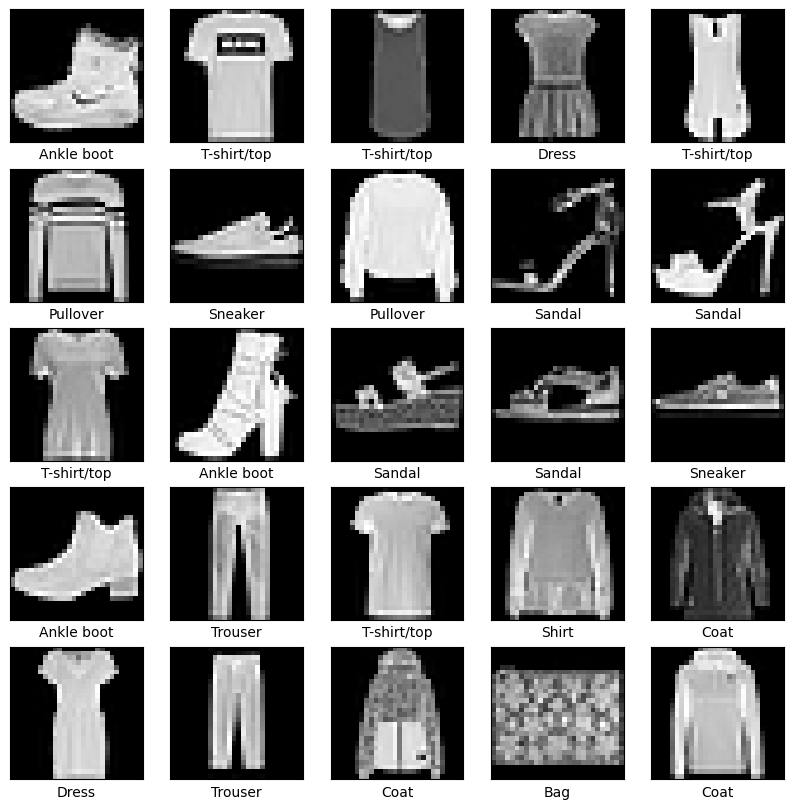

In [3]:
# Define class names for the labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Visualize some of the images and their labels
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap='gray')
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
# Build the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Reshape images for the CNN (adding channel dimension for grayscale images)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))


In [6]:
# Train the model
model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 17ms/step - accuracy: 0.7347 - loss: 0.7064 - val_accuracy: 0.8721 - val_loss: 0.3592
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8790 - loss: 0.3305 - val_accuracy: 0.8883 - val_loss: 0.3115
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 32s 17ms/step - accuracy: 0.8995 - loss: 0.2718 - val_accuracy: 0.8900 - val_loss: 0.3014
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9124 - loss: 0.2399 - val_accuracy: 0.9020 - val_loss: 0.2690
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9205 - loss: 0.2157 - val_accuracy: 0.8995 - val_loss: 0.2680
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9265 - loss: 0.1964 - val_accuracy: 0.9094 - val_loss: 0.2608
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9361 - loss: 0.1719 - val_accuracy: 0.9024 - val_loss: 0.2777
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 17ms/step - accuracy: 0.9403 -

In [7]:
# Evaluate the model performance on test data
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'\nTest accuracy: {test_acc}')

313/313 - 2s - 5ms/step - accuracy: 0.9040 - loss: 0.2958

Test accuracy: 0.9039999842643738
